# Analisis Data

## Data preparation

### Import library

In [1]:
#Import library yang dibutuhkan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

### Menampilkan data

In [2]:
#Membaca datafile kita dan mengambil beberapa kolom yg dibutuhkan saja
df = pd.read_csv('cardata.csv')

In [3]:
#Menampilkan datafile
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Menampilkan informasi data

In [4]:
#Untuk mengetahui jumlah baris dan kolom datafile kita
df.shape

(301, 10)

In [5]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.tail()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,honda,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,honda,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
#Untuk menampilkan info datafile kita meliputi baris,kolom,tipe data,memori yg digunakan,dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [8]:
#Untuk melihat statiska datafile kita meliputi rata-rata,minimum,maximum,dll
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Nilai Unique

In [9]:
unique_values = df.nunique()
unique_values

Car_Name          98
company            9
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

Text(0.5, 0, 'Variabel')

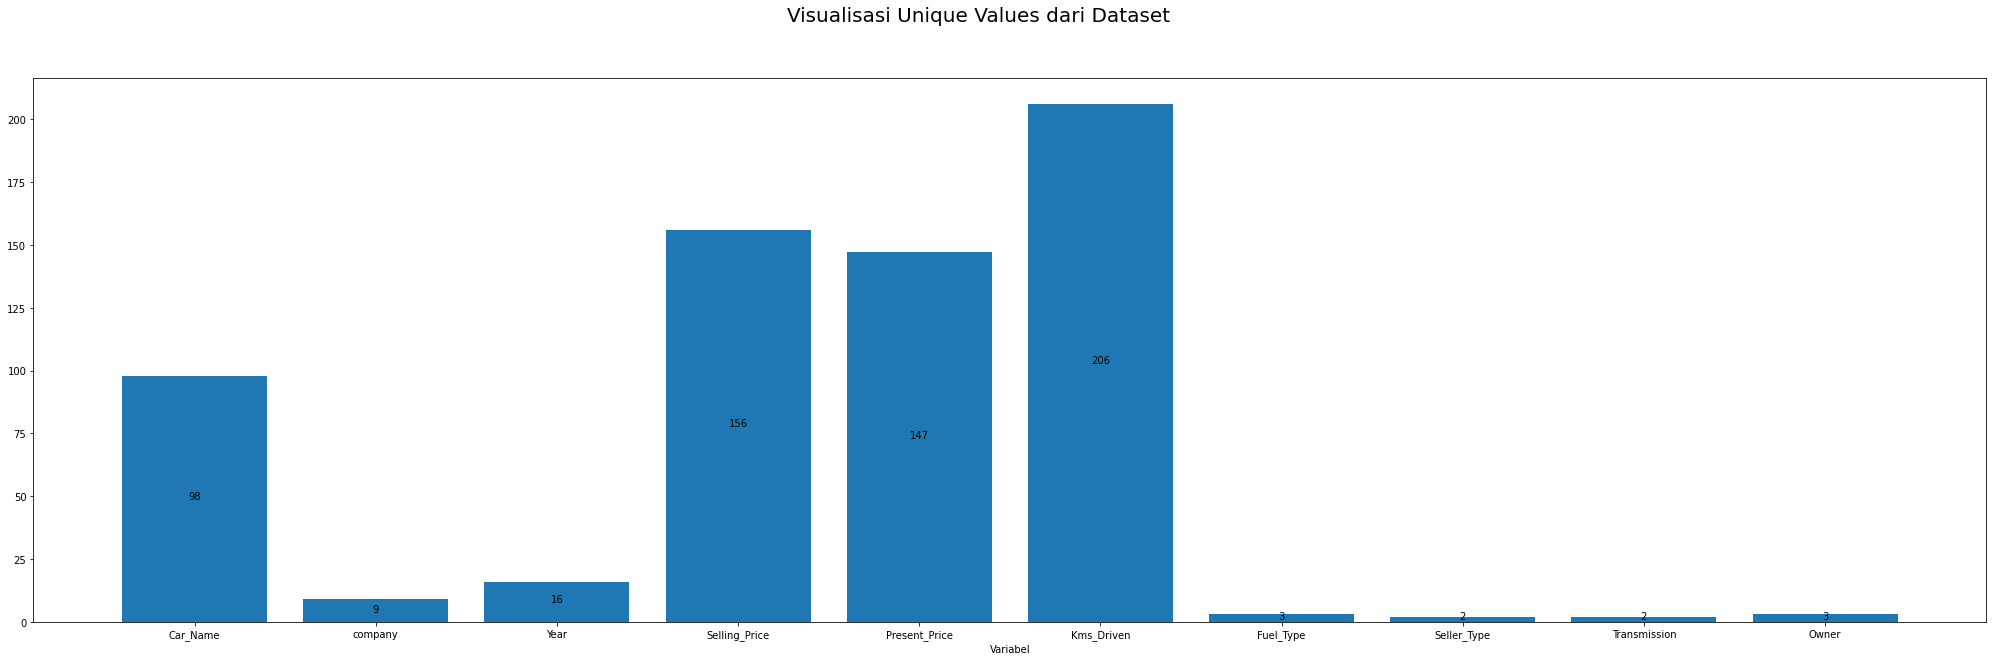

In [10]:
#Visualisasi Unique Values
fig = plt.figure(figsize=(35,10))
plt.bar(df.columns, unique_values)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
addlabels(df.columns, unique_values)

fig.suptitle('Visualisasi Unique Values dari Dataset', fontsize=20)
plt.xlabel('Variabel', fontsize=10)

### Categorical

In [11]:
# Melihat data kategorikal

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 5 categorical variables

The categorical variables are : ['Car_Name', 'company', 'Fuel_Type', 'Seller_Type', 'Transmission']


,Car_Name,company,Fuel_Type,Seller_Type,Transmission
0,ritz,maruti suzuki,Petrol,Dealer,Manual
1,sx4,maruti suzuki,Diesel,Dealer,Manual
2,ciaz,maruti suzuki,Petrol,Dealer,Manual
3,wagon r,maruti suzuki,Petrol,Dealer,Manual
4,swift,maruti suzuki,Diesel,Dealer,Manual


In [12]:
# Meliat data cardinal di kategorikal variabel 

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Car_Name  contains  98  labels
company  contains  9  labels
Fuel_Type  contains  3  labels
Seller_Type  contains  2  labels
Transmission  contains  2  labels


### Numerical

In [13]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df[numerical].head()

There are 5 numerical variables

The numerical variables are : ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


### Missing value

In [14]:
#Untuk mengetahui missing value atau nilai yg kosong 
df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Outliers

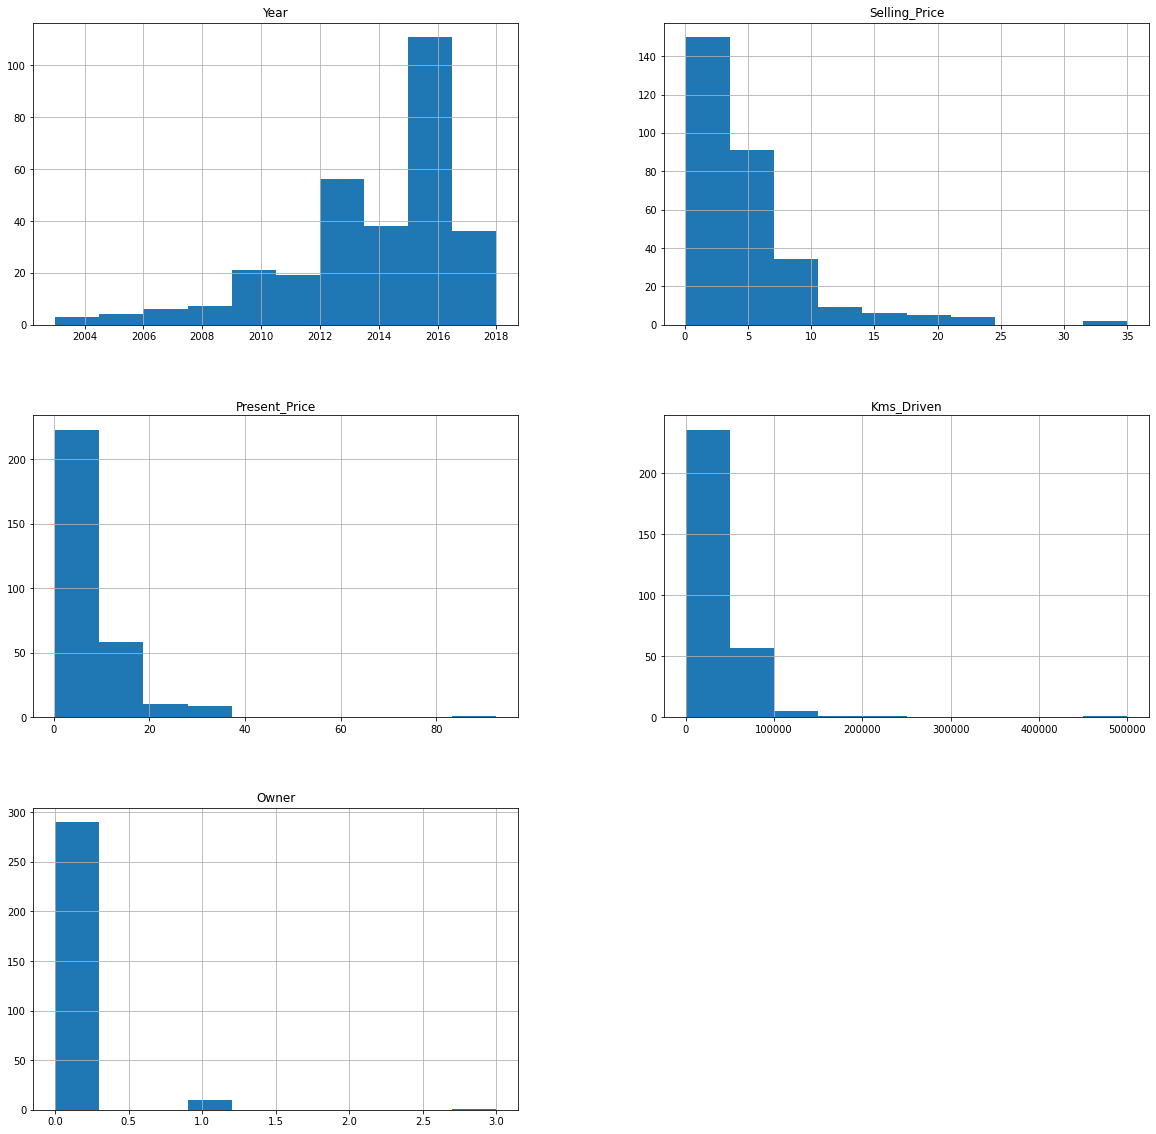

In [15]:
#Menampilkan histogram data 
df.hist(bins=10, figsize=(20,20))

plt.show()

Text(0, 0.5, 'Owner')

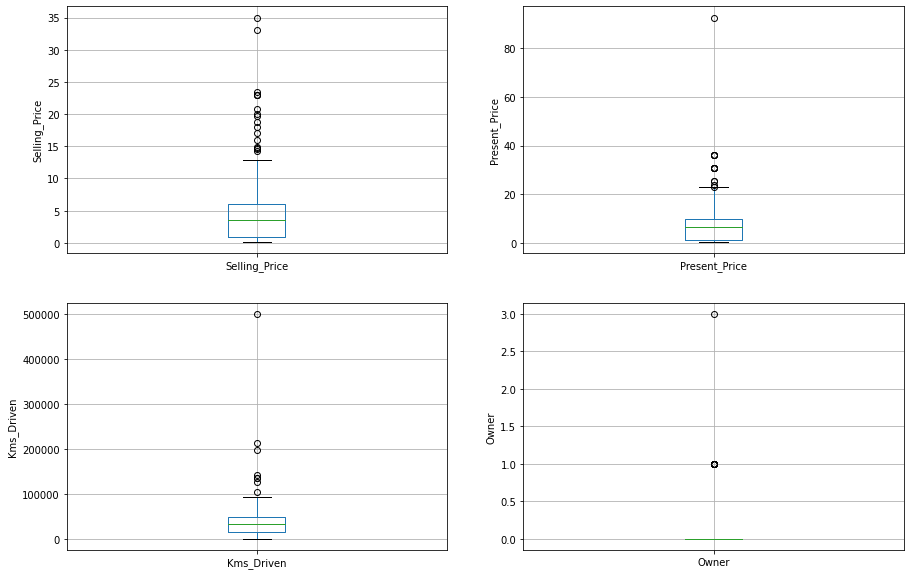

In [16]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Selling_Price')
fig.set_title('')
fig.set_ylabel('Selling_Price')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Present_Price')
fig.set_title('')
fig.set_ylabel('Present_Price')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Kms_Driven')
fig.set_title('')
fig.set_ylabel('Kms_Driven')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Owner')
fig.set_title('')
fig.set_ylabel('Owner')

### Correlation

In [17]:
#Menampilkan kolerasi dari semua kolom data
korelasi=df.corr()
korelasi

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


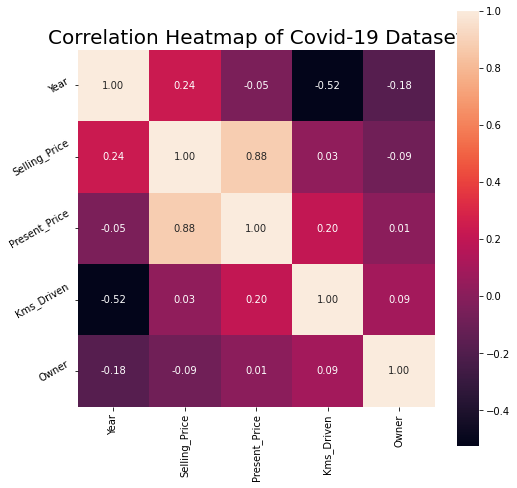

In [18]:
#Menampilkan visualisasi kolerasi data
correlation = df.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Heatmap of Covid-19 Dataset', fontsize=20)
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()
#sns.heatmap(kolerasi);

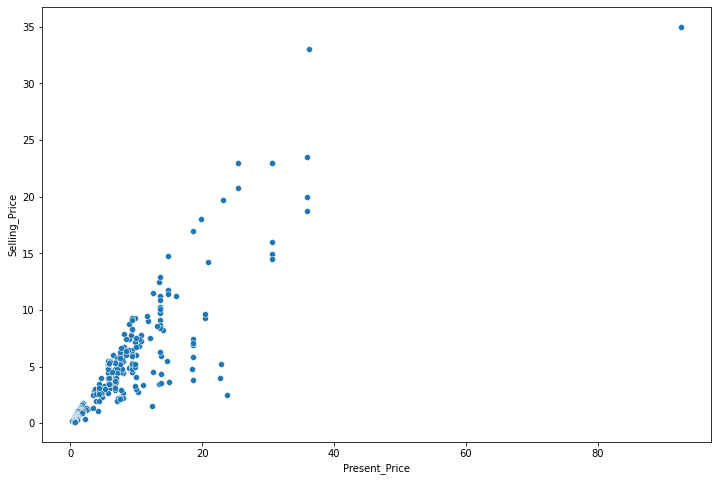

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['Selling_Price'],  x = df['Present_Price'])
plt.show()

### Visualisasi kolom

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


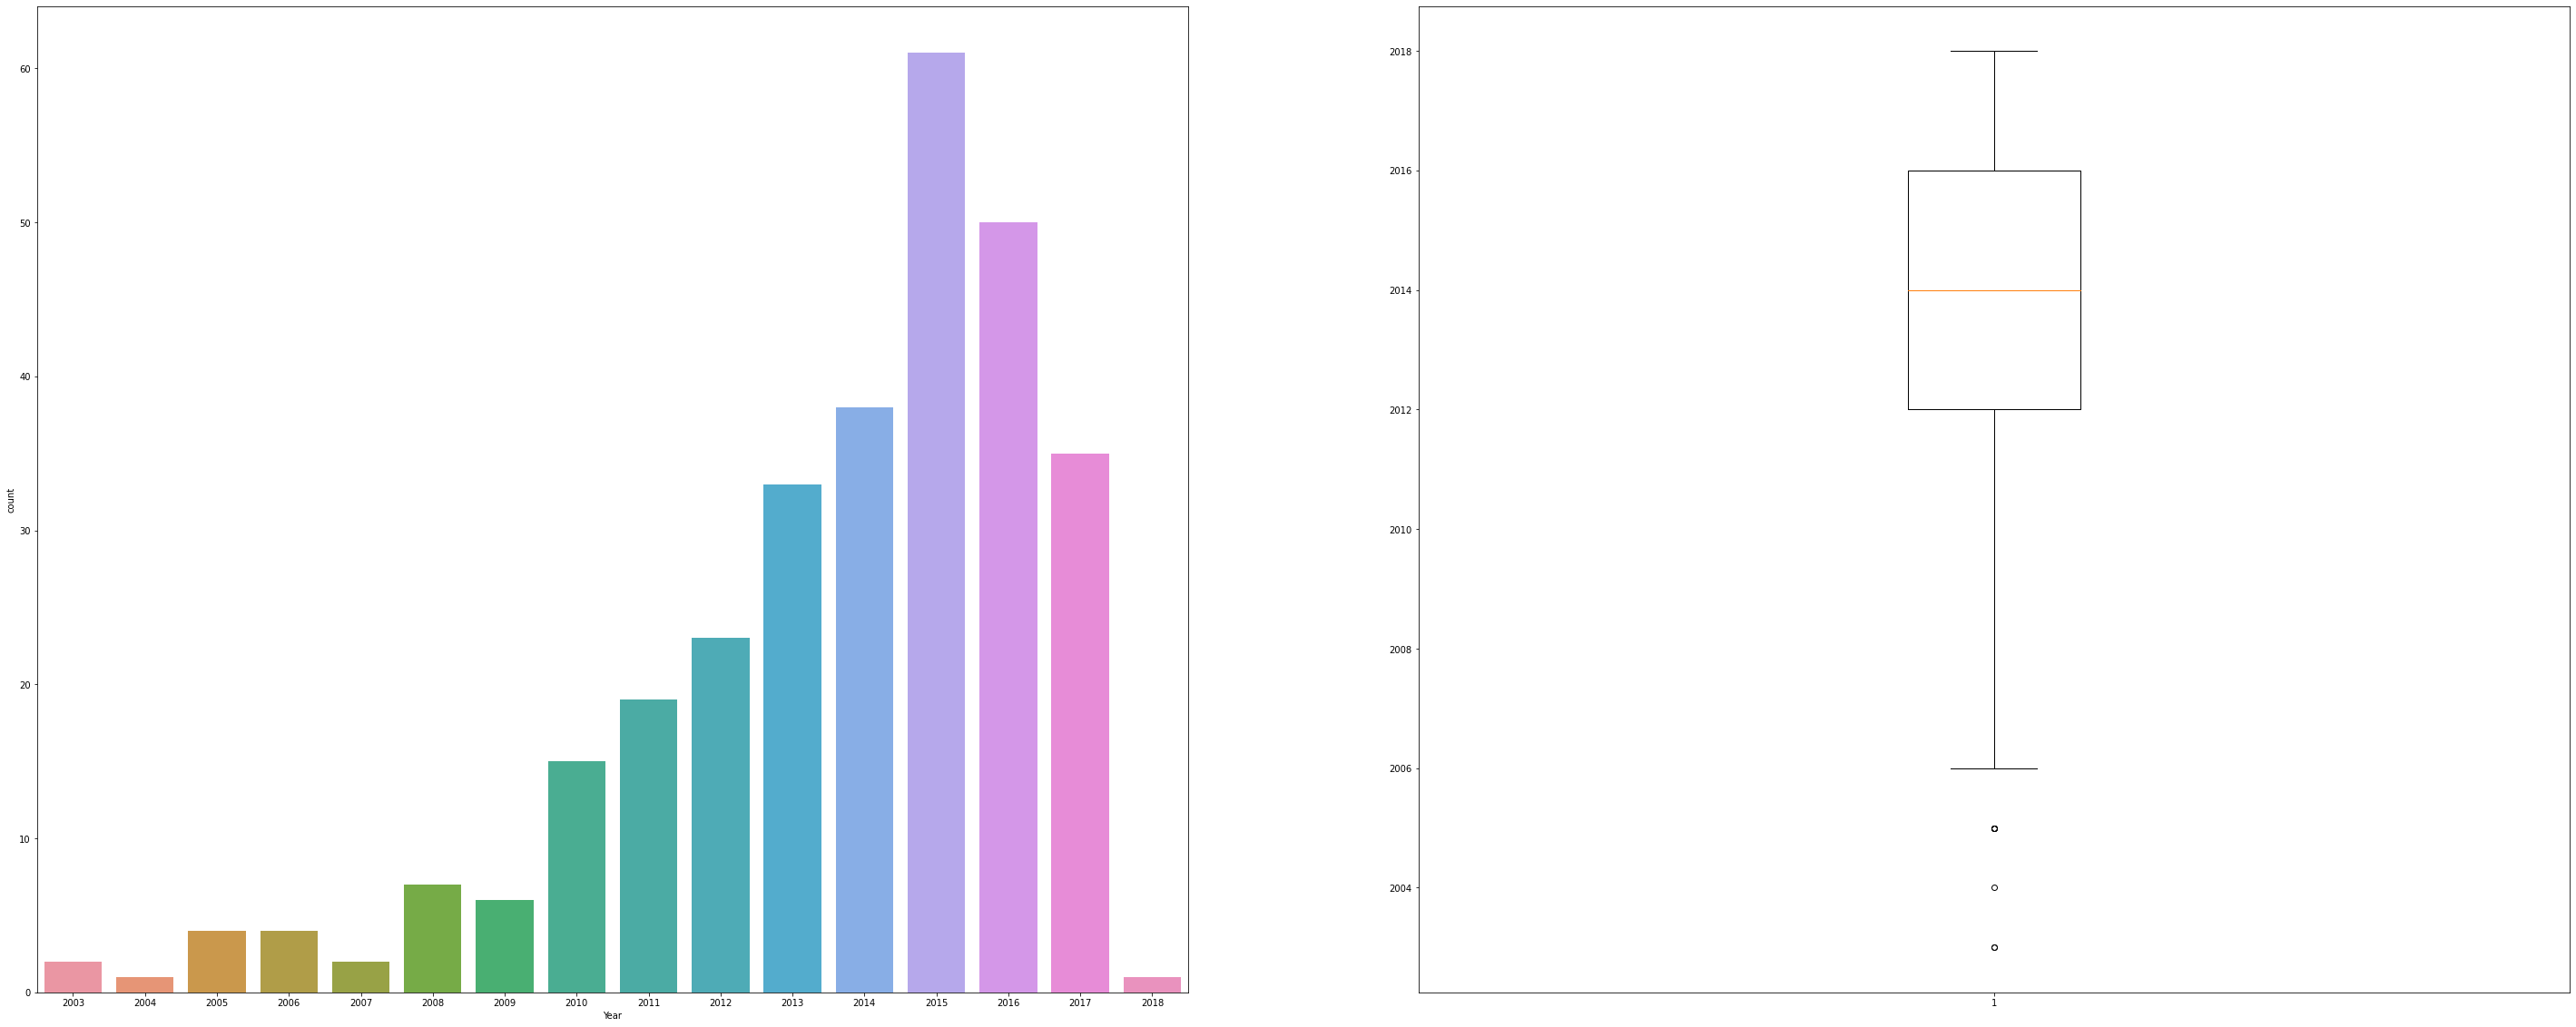

In [20]:
#Analisis untuk melihat distribusi dari masing-masing kolom dalam bentuk grafik dan box
f = plt.figure(figsize=(50,20))

f.add_subplot(1,2,1)
sns.countplot(df['Year'])

f.add_subplot(1,2,2)
plt.boxplot(df['Year'])
plt.show()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

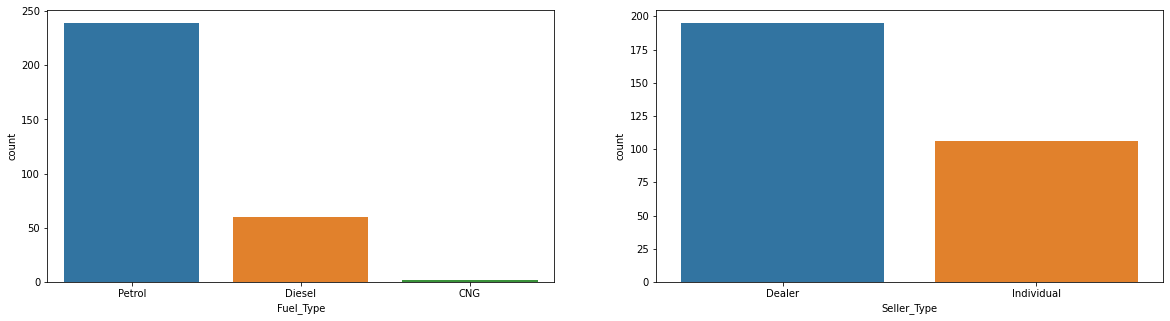

In [21]:
#Analisis untuk melihat distribusi dari masing-masing kolom dalam bentuk grafik dan box
f = plt.figure(figsize=(20,5))

f.add_subplot(1,2,1)
sns.countplot(df['Fuel_Type'])

f.add_subplot(1,2,2)
sns.countplot(df['Seller_Type'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

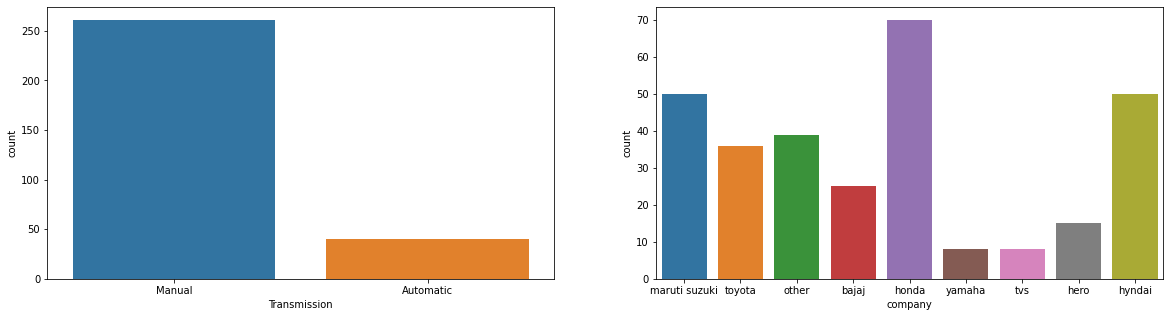

In [22]:
#Analisis untuk melihat distribusi dari masing-masing kolom dalam bentuk grafik dan box
f = plt.figure(figsize=(20,5))

f.add_subplot(1,2,2)
sns.countplot(df['company'])

f.add_subplot(1,2,1)
sns.countplot(df['Transmission'])

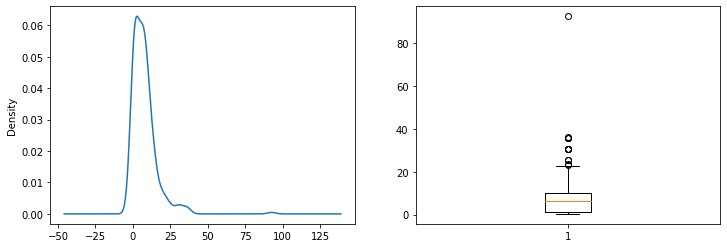

In [23]:
#Untuk melihat sencity/pemerataan distribusi dari harga
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Present_Price'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Present_Price'])
plt.show()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

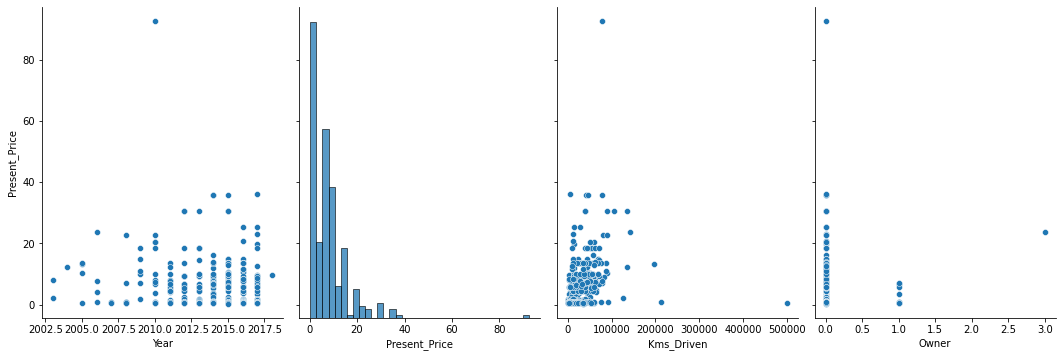

In [24]:
#Untuk mengetahui hubungan antara independen dan dependen ariabel 
f = plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Year','Present_Price','Kms_Driven','Owner'], y_vars=['Present_Price'], size=5, aspect=0.75)
plt.show()

## Data preprocessing

### Handle Outlier

In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Present price

In [26]:
mean = df['Present_Price'].mean()
std = df['Present_Price'].std()

In [27]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

<function matplotlib.pyplot.show(close=None, block=None)>

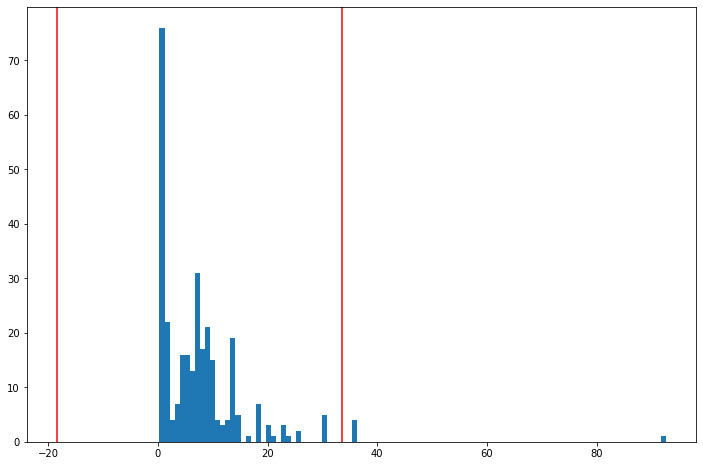

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Present_Price'], bins=100)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show

#### Selling price

In [29]:
mean = df['Selling_Price'].mean()
std = df['Selling_Price'].std()

In [30]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

<function matplotlib.pyplot.show(close=None, block=None)>

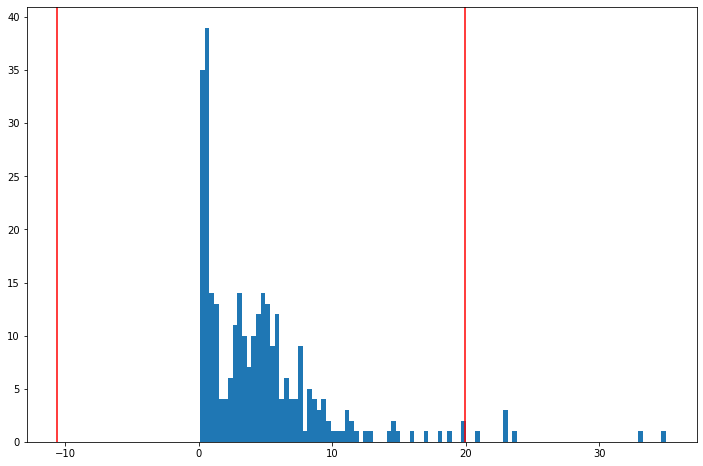

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Selling_Price'], bins=100)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show

#### Kms Driven

In [32]:
mean = df['Kms_Driven'].mean()
std = df['Kms_Driven'].std()

In [33]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

<function matplotlib.pyplot.show(close=None, block=None)>

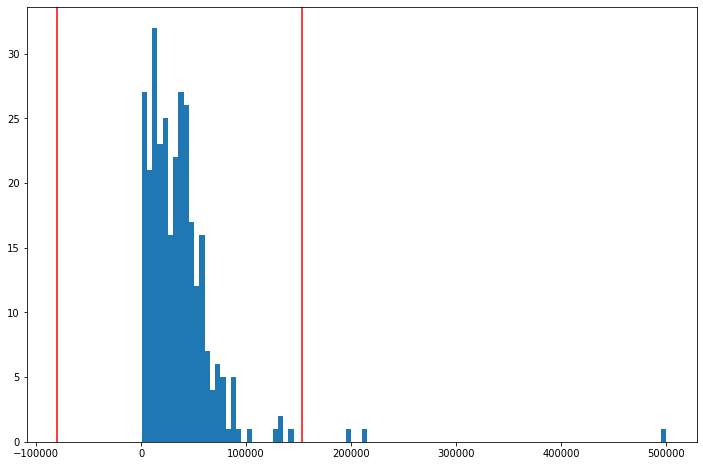

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Kms_Driven'], bins=100)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show

#### Owner

In [35]:
mean = df['Owner'].mean()
std = df['Owner'].std()

In [36]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

<function matplotlib.pyplot.show(close=None, block=None)>

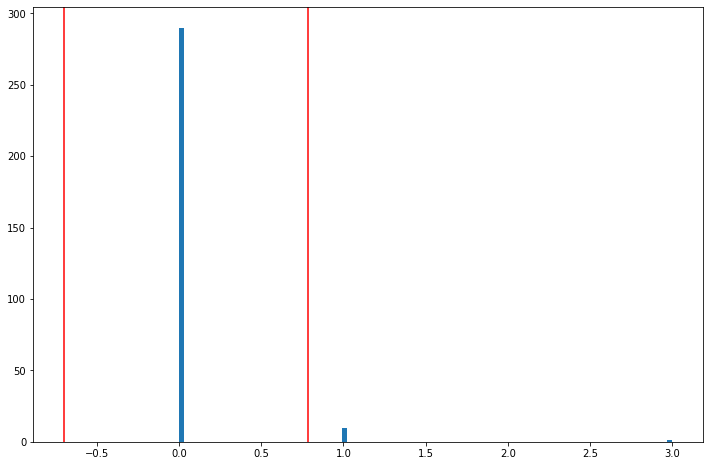

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Owner'], bins=100)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show

### Feature selection

In [38]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
# drop the original variable
df.drop('Owner', axis=1, inplace = True)

In [40]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual


### Encoding categorical variable

In [41]:
#Mengganti tipe data String menjadi numerik
label_encoder = LabelEncoder()
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])

In [42]:
#Mengganti tipe data String menjadi numerik
label_encoder = LabelEncoder()
df['company'] = label_encoder.fit_transform(df['company'])

In [43]:
#Mengganti tipe data String menjadi numerik
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])

In [44]:
#Mengganti tipe data String menjadi numerik
label_encoder = LabelEncoder()
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])

In [45]:
#Mengganti tipe data String menjadi numerik
label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int32  
 1   company        301 non-null    int32  
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    int32  
 7   Seller_Type    301 non-null    int32  
 8   Transmission   301 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 15.4 KB


## Train Test Split

### Training and testing

In [47]:
#Membagi variabel independen dan dependen menggunakan x dan y
x = df.drop(columns='Present_Price')
y = df['Present_Price']

In [48]:
#Membuat data training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
#Untuk mengetahui jumlah baris dan kolom masing-masing variabel
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


### MinMax Scalling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)
df

array([[ 1.07432341,  0.28502265,  0.128897  , ...,  0.50018321,
        -0.73728539,  0.39148015],
       [ 1.19182753,  0.28502265, -0.21751369, ..., -1.85224094,
        -0.73728539,  0.39148015],
       [ 0.21262651,  0.28502265,  1.16812909, ...,  0.50018321,
        -0.73728539,  0.39148015],
       ...,
       [ 0.25179455, -0.73630851, -1.60315648, ...,  0.50018321,
        -0.73728539,  0.39148015],
       [ 0.25179455, -0.73630851,  1.16812909, ..., -1.85224094,
        -0.73728539,  0.39148015],
       [ 0.13429043, -0.73630851,  0.8217184 , ...,  0.50018321,
        -0.73728539,  0.39148015]])

In [51]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Model evaluation

### Model training

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

### Accuracy Score

In [ ]:
#Untuk mencari akurasi score dari model kita
model.score(x_train, y_train)

In [ ]:
#Untuk mencari akurasi score dari model kita
model.score(x_test, y_test)

### Prediksi

In [ ]:
#Untuk memprediksi x dan y
y_pred = model.predict(x_test)

In [ ]:
df.head()

In [ ]:
#Sudah bisa Melakukan prediksi sesuai permintaan
model.predict([[90,4,2014,3.35,27000,2,0,1]])